# Анализ датасета restaurant8k

## Установка зависимостей

In [168]:
%pip install pandas
%pip install matplotlib
%pip install numpy


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installa

## Преподготовка

Подготовим данные датасета для удобного анализа, уменьшим nesting, приведем к общему именованию с ATIS датасетом

In [169]:
import string

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import utils


In [170]:
r8k_path = "../data/source/restaurant8k/"


In [171]:
from dataclasses import dataclass


@dataclass
class Restaurant8k:
    train: pd.DataFrame
    test: pd.DataFrame


In [172]:
train_df = pd.read_json(r8k_path + "train_0.json")
test_df = pd.read_json(r8k_path + "test.json")
r8k = Restaurant8k(train=train_df, test=test_df)


In [173]:
r8k.train

,userInput,context,labels
0,{'text': 'There will be 5 adults and 1 child.'},{'requestedSlots': ['people']},"[{'slot': 'people', 'valueSpan': {'startIndex'..."
1,{'text': 'We will require and outside table to...,NaN,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
2,{'text': 'Do you have room for 11 of us?'},NaN,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
3,{'text': 'We are 13 and have a table.'},NaN,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
4,{'text': '6 a.m.'},{'requestedSlots': ['time']},"[{'slot': 'time', 'valueSpan': {'endIndex': 6}}]"
...,...,...,...
8193,{'text': 'I just want information about Lyonna...,NaN,NaN
8194,{'text': 'I want to go to Hix Mayfair.'},NaN,NaN
8195,{'text': '18'},"{'requestedSlots': ['people', 'time']}","[{'slot': 'time', 'valueSpan': {'endIndex': 2}}]"
8196,{'text': 'I'd like a table in the morning at 1...,NaN,"[{'slot': 'time', 'valueSpan': {'startIndex': ..."


In [174]:
r8k.test

,userInput,context,labels
0,{'text': '13'},{'requestedSlots': ['time']},"[{'slot': 'time', 'valueSpan': {'endIndex': 2}}]"
1,{'text': '13'},{'requestedSlots': ['people']},"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
2,{'text': '13'},{'requestedSlots': ['people']},"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
3,{'text': '14'},{'requestedSlots': ['people']},"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
4,{'text': '14'},{'requestedSlots': ['people']},"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
...,...,...,...
3726,{'text': 'The Cazaree party of two'},NaN,"[{'slot': 'last_name', 'valueSpan': {'startInd..."
3727,{'text': 'Use the name Anne Pegg'},NaN,"[{'slot': 'first_name', 'valueSpan': {'startIn..."
3728,{'text': 'Book under Elanor Dinkel'},NaN,"[{'slot': 'first_name', 'valueSpan': {'startIn..."
3729,{'text': 'Karla Trevizo i don't remember the p...,"{'requestedSlots': ['first_name', 'last_name']}","[{'slot': 'first_name', 'valueSpan': {'endInde..."


Т.к. многие поля с контекстом пустуют ими можно пренебречь и удалить

In [175]:
r8k_labels_train = []
r8k_texts_train = []

notnull_values = pd.notnull(r8k.train["labels"])

for i in range(len(r8k.train)):
    if notnull_values[i]:
        r8k_texts_train.append(
            r8k.train["userInput"][i]["text"]
        )
        r8k_labels_train.append(r8k.train["labels"][i])

r8k.train = pd.DataFrame()
r8k.train["text"] = r8k_texts_train
r8k.train["entities"] = r8k_labels_train
r8k.train


,text,entities
0,There will be 5 adults and 1 child.,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
1,We will require and outside table to seat 9 pe...,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
2,Do you have room for 11 of us?,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
3,We are 13 and have a table.,"[{'slot': 'people', 'valueSpan': {'startIndex'..."
4,6 a.m.,"[{'slot': 'time', 'valueSpan': {'endIndex': 6}}]"
...,...,...
5218,Biersack,"[{'slot': 'last_name', 'valueSpan': {'endIndex..."
5219,Four persons will be dining in our party.,"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
5220,in 12 more days,"[{'slot': 'date', 'valueSpan': {'endIndex': 15}}]"
5221,18,"[{'slot': 'time', 'valueSpan': {'endIndex': 2}}]"


In [176]:
r8k_labels_test = []
r8k_texts_test = []

notnull_values = pd.notnull(r8k.test["labels"])

for i in range(len(r8k.test)):
    if notnull_values[i]:
        r8k_texts_test.append(
            r8k.test["userInput"][i]["text"]
        )
        r8k_labels_test.append(r8k.test["labels"][i])

r8k.test = pd.DataFrame()
r8k.test["text"] = r8k_texts_test
r8k.test["entities"] = r8k_labels_test
r8k.test


,text,entities
0,13,"[{'slot': 'time', 'valueSpan': {'endIndex': 2}}]"
1,13,"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
2,13,"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
3,14,"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
4,14,"[{'slot': 'people', 'valueSpan': {'endIndex': ..."
...,...,...
2374,The Cazaree party of two,"[{'slot': 'last_name', 'valueSpan': {'startInd..."
2375,Use the name Anne Pegg,"[{'slot': 'first_name', 'valueSpan': {'startIn..."
2376,Book under Elanor Dinkel,"[{'slot': 'first_name', 'valueSpan': {'startIn..."
2377,Karla Trevizo i don't remember the phone number,"[{'slot': 'first_name', 'valueSpan': {'endInde..."


Переименуем поля и развернем `valueSpan` на 2 переменные начала и конца

In [177]:
for i in range(len(r8k.train)):
    for j in range(len(r8k.train["entities"][i])):
        r8k.train["entities"][i][j]["entity"] = r8k.train["entities"][i][j].pop(
            "slot"
        )

        if "startIndex" not in r8k.train["entities"][i][j]["valueSpan"]:
            r8k.train["entities"][i][j]["start"] = 0
        else:
            r8k.train["entities"][i][j]["start"] = r8k.train["entities"][i][j]["valueSpan"]["startIndex"] - 1
            if r8k.train["text"][i][r8k.train["entities"][i][j]["start"]] == " ":
                r8k.train["entities"][i][j]["start"] += 1

        r8k.train["entities"][i][j]["end"] = r8k.train["entities"][i][j]["valueSpan"]["endIndex"] - 1

        start_pos = r8k.train["entities"][i][j]["start"]
        end_pos = r8k.train["entities"][i][j]["end"]

        r8k.train["entities"][i][j]["value"] = r8k.train["text"][i][start_pos:end_pos+1]

        # Removing unnecessary key
        r8k.train["entities"][i][j].pop("valueSpan", None)

r8k.train


,text,entities
0,There will be 5 adults and 1 child.,"[{'entity': 'people', 'start': 14, 'end': 33, ..."
1,We will require and outside table to seat 9 pe...,"[{'entity': 'people', 'start': 42, 'end': 49, ..."
2,Do you have room for 11 of us?,"[{'entity': 'people', 'start': 21, 'end': 22, ..."
3,We are 13 and have a table.,"[{'entity': 'people', 'start': 7, 'end': 8, 'v..."
4,6 a.m.,"[{'entity': 'time', 'start': 0, 'end': 5, 'val..."
...,...,...
5218,Biersack,"[{'entity': 'last_name', 'start': 0, 'end': 7,..."
5219,Four persons will be dining in our party.,"[{'entity': 'people', 'start': 0, 'end': 3, 'v..."
5220,in 12 more days,"[{'entity': 'date', 'start': 0, 'end': 14, 'va..."
5221,18,"[{'entity': 'time', 'start': 0, 'end': 1, 'val..."


In [178]:
for i in range(len(r8k.test)):
    for j in range(len(r8k.test["entities"][i])):
        r8k.test["entities"][i][j]["entity"] = r8k.test["entities"][i][j].pop(
            "slot"
        )

        if "startIndex" not in r8k.test["entities"][i][j]["valueSpan"]:
            r8k.test["entities"][i][j]["start"] = 0
        else:
            r8k.test["entities"][i][j]["start"] = r8k.test["entities"][i][j]["valueSpan"]["startIndex"] - 1
            if r8k.test["text"][i][r8k.test["entities"][i][j]["start"]] == " ":
                r8k.test["entities"][i][j]["start"] += 1
        r8k.test["entities"][i][j]["end"] = r8k.test["entities"][i][j]["valueSpan"]["endIndex"] - 1

        start_pos = r8k.test["entities"][i][j]["start"]
        end_pos = r8k.test["entities"][i][j]["end"]

        r8k.test["entities"][i][j]["value"] = r8k.test["text"][i][start_pos:end_pos+1]

        # Removing unnecessary key
        r8k.test["entities"][i][j].pop("valueSpan", None)

r8k.test


,text,entities
0,13,"[{'entity': 'time', 'start': 0, 'end': 1, 'val..."
1,13,"[{'entity': 'people', 'start': 0, 'end': 1, 'v..."
2,13,"[{'entity': 'people', 'start': 0, 'end': 1, 'v..."
3,14,"[{'entity': 'people', 'start': 0, 'end': 1, 'v..."
4,14,"[{'entity': 'people', 'start': 0, 'end': 1, 'v..."
...,...,...
2374,The Cazaree party of two,"[{'entity': 'last_name', 'start': 4, 'end': 10..."
2375,Use the name Anne Pegg,"[{'entity': 'first_name', 'start': 13, 'end': ..."
2376,Book under Elanor Dinkel,"[{'entity': 'first_name', 'start': 11, 'end': ..."
2377,Karla Trevizo i don't remember the phone number,"[{'entity': 'first_name', 'start': 0, 'end': 4..."


## Анализ сущностей

Т.к. в этом датасете отсутствуют интенты, то изучать будем только сущности

In [179]:
@dataclass
class EntityClasses:
    train: list
    test: list


In [180]:
entity_classes_train = utils.get_entity_classes(r8k.train)
entity_classes_test = utils.get_entity_classes(r8k.test)
entity_classes = EntityClasses(
    train=entity_classes_train, test=entity_classes_test
)


In [181]:
entity_classes.train

['people', 'first_name', 'time', 'last_name', 'date']

In [182]:
entity_classes.test

['people', 'first_name', 'time', 'last_name', 'date']

In [183]:
@dataclass
class EntityClassesDistribution:
    train: dict
    train_size: int
    test: dict
    test_size: int
    df: pd.DataFrame


In [184]:
entity_classes_distribution_train = utils.eval_entity_classes_distribution(
    r8k.train, entity_classes.train
)
entities_count_train = np.array(
    list(entity_classes_distribution_train.values())
).sum()
entity_classes_distribution_train_persents = utils.eval_persentage(
    entity_classes_distribution_train, entities_count_train
)

entity_classes_distribution_test = utils.eval_entity_classes_distribution(
    r8k.test, entity_classes.test
)
entities_count_test = np.array(
    list(entity_classes_distribution_test.values())
).sum()
entity_classes_distribution_test_persents = utils.eval_persentage(
    entity_classes_distribution_test, entities_count_test
)

intent_classes_distribution_df = pd.DataFrame({
    "train": entity_classes_distribution_train_persents,
    "test": entity_classes_distribution_test_persents
})

entity_classes_distribution = EntityClassesDistribution(
    train=entity_classes_distribution_train_persents, train_size=entities_count_train,
    test=entity_classes_distribution_test_persents, test_size=entities_count_test,
    df=intent_classes_distribution_df
)


In [185]:
entity_classes_distribution.df


,train,test
people,28.343157,28.271498
time,25.828422,24.532643
date,22.540930,23.065861
last_name,11.669941,12.251941
first_name,11.617551,11.878056


In [186]:
print(
    f"Intent classes mean in dataset\n{entity_classes_distribution.df.mean()}"
)


Intent classes mean in dataset
train    20.0
test     20.0
dtype: float64


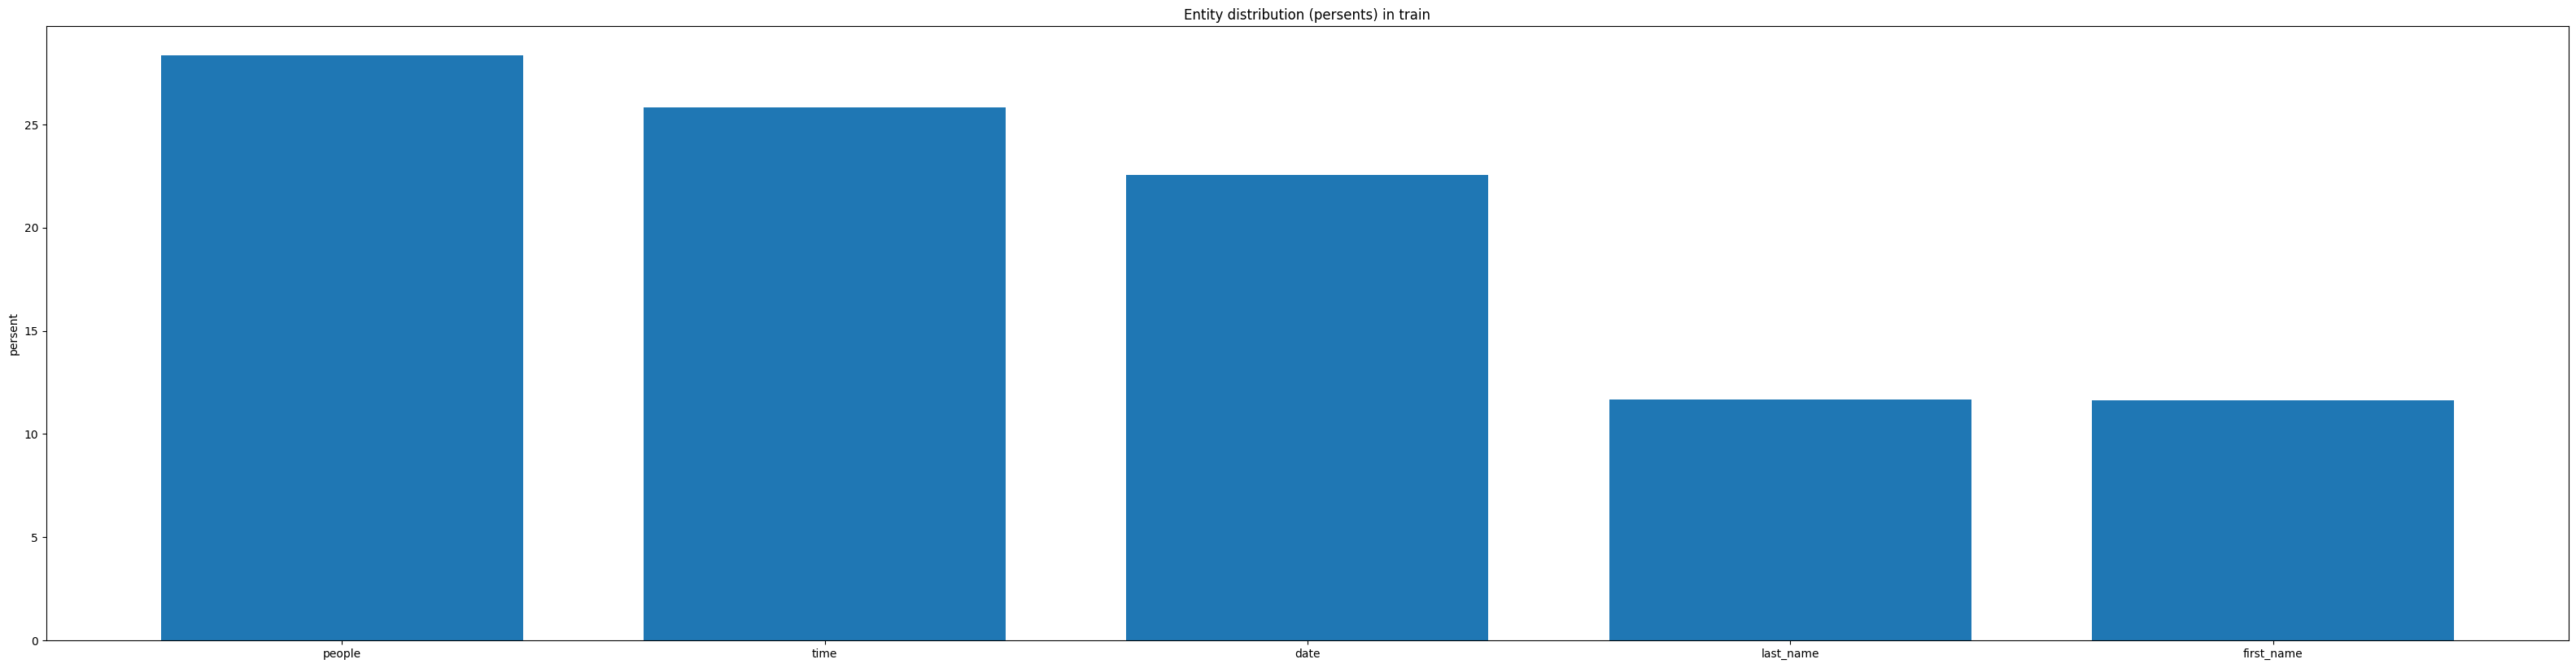

In [187]:
utils.show_classes_distribution(
    entity_classes_distribution.train,
    plt_name="Entity distribution (persents) in train",
    ylabel="persent",
    figsize=(40, 10)
)


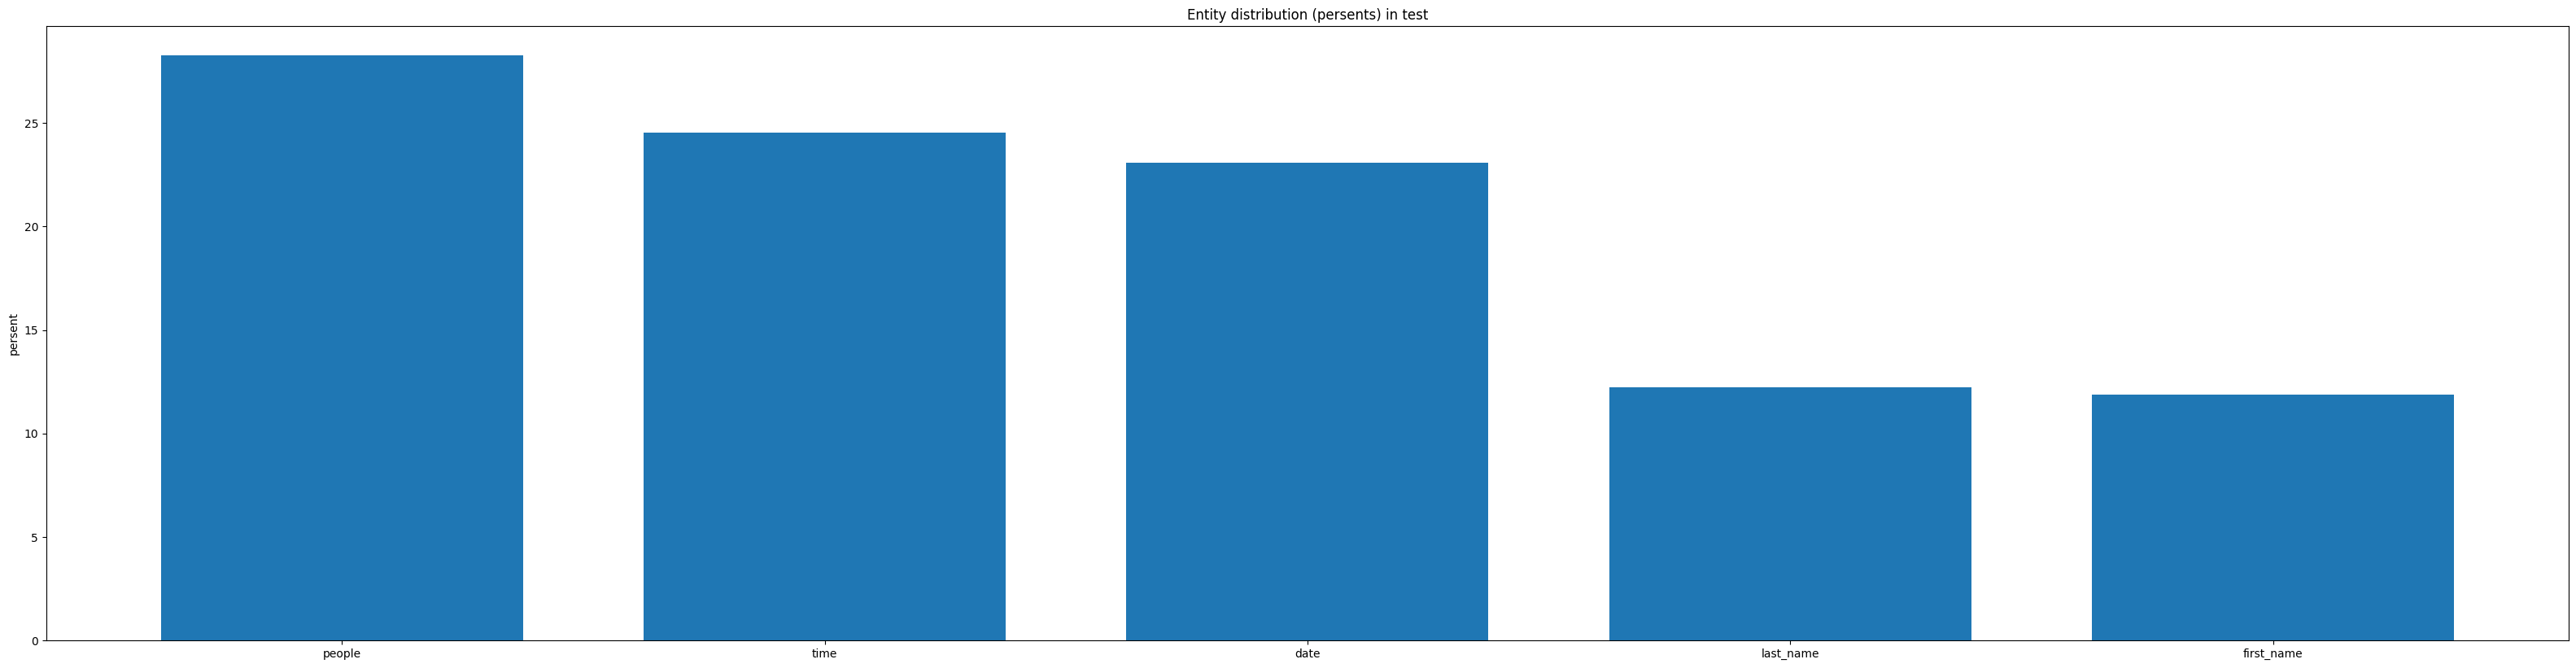

In [188]:
utils.show_classes_distribution(
    entity_classes_distribution.test,
    plt_name="Entity distribution (persents) in test",
    ylabel="persent",
    figsize=(40, 10)
)


## Сохранение промежуточных результатов в `json` файл

In [189]:
r8k_save_path = "../data/preprocessed/restaurant8k/"


In [190]:
r8k.train.to_json(r8k_save_path + "train.json")
r8k.test.to_json(r8k_save_path + "test.json")
